<a href="https://colab.research.google.com/github/Lourdest812/Data-Science-I/blob/main/ProyectoParteIII%2BToledo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Objetivos del proyecto y preguntas de investigación**

El objetivo general de este proyecto es analizar el *Breast Cancer Wisconsin Diagnostic Dataset* para identificar patrones que permitan clasificar tumores como benignos o malignos de manera precisa.

A continuación, se detallan las preguntas de investigación junto con sus respectivas hipótesis:

1. **¿Qué variables tienen mayor influencia en la clasificación de un tumor como maligno o benigno?**  
   *Hipótesis:* Las variables relacionadas con el tamaño del tumor, como `radius_mean`, `area_mean` y `perimeter_mean`, tendrán una mayor influencia en el diagnóstico.

2. **¿Existen patrones visuales que permitan diferenciar fácilmente entre tumores malignos y benignos?**  
   *Hipótesis:* El radio, la textura y la concavidad del tumor permitirán distinguir visualmente entre tumores benignos y malignos mediante gráficos de dispersión y boxplots.

3. **¿Puede un modelo de clasificación supervisada, como KNN, predecir con precisión el tipo de tumor a partir de las variables numéricas?**  
   *Hipótesis:* El modelo KNN logrará una precisión superior al 90% al contar con patrones claramente diferenciables entre clases.

4. **¿Qué tan precisas son las predicciones del modelo y qué métricas nos ayudan a validar su desempeño?**  
   *Hipótesis:* El modelo tendrá buen desempeño en precisión, recall y F1 score, con valores cercanos a 1, especialmente en la clase de tumores malignos.

## **Problema comercial**

El cáncer de mama es una de las enfermedades más comunes y mortales entre mujeres en todo el mundo. Su detección temprana es vital para aumentar las tasas de supervivencia y reducir los costos médicos a largo plazo. Sin embargo, el análisis manual de imágenes médicas puede ser subjetivo, demorado y costoso, especialmente en centros con alta demanda o escasos recursos.

En este contexto, surgen preguntas clave para el desarrollo de soluciones automáticas basadas en datos:

1. **¿Qué características del tumor aportan más información para diferenciar entre malignos y benignos?**  
   *Esto es clave para desarrollar modelos predictivos más simples, rápidos y eficientes, eliminando ruido y mejorando la precisión diagnóstica.*

2. **¿Es posible identificar patrones visuales claros que ayuden a los médicos a interpretar más rápido ciertos casos?**  
   *Facilitar la interpretación de resultados en entornos clínicos puede acelerar la toma de decisiones médicas.*

3. **¿Un modelo supervisado como KNN podría ser implementado como herramienta de apoyo diagnóstico?**  
   *Un modelo confiable puede servir como filtro inicial o segundo lector para casos sospechosos, reduciendo el error humano.*

4. **¿Qué tan confiables son estos modelos y cómo validamos su utilidad en entornos reales?**  
   *Las métricas de evaluación permiten determinar si el modelo tiene el rendimiento necesario para ser considerado en un entorno clínico.*

Este proyecto responde directamente a estas preguntas, simulando un sistema de apoyo al diagnóstico temprano del cáncer de mama mediante la extracción de patrones a partir de datos médicos estructurados.

##**Contexto analítico**

Vamos a utilizar el **Breast Cancer Wisconsin Diagnostic Dataset**, un conjunto de datos ampliamente utilizado en el ámbito de la ciencia de datos y la medicina para la clasificación de tumores de mama como **benignos o malignos**.

Este dataset fue generado a partir de imágenes digitalizadas de aspiraciones con aguja fina (FNA) de masas mamarias. A partir de estas imágenes se extrajeron **30 características numéricas** relacionadas con la forma, textura, tamaño y bordes de los núcleos celulares presentes en el tejido.

Cada instancia representa un tumor, e incluye:
- 30 variables numéricas como `radius_mean`, `texture_mean`, `area_mean`, etc.
- Una columna con el **diagnóstico** (`M` para maligno y `B` para benigno).
- Una columna `target` creada para obtener la información de la columna `diagnosis` pero convertida a 0s y 1s (0 para maligno y 1 para benigno) con el objetivo de que sea más sencillo trabajar con esta información convertida a valores numéricos.
- Una columna `id` y otra sin nombre útil (`Unnamed: 32`), que fueron descartadas en el preprocesamiento.


El dataset contiene un total de **569 muestras**, de las cuales **357 son benignas** y **212 malignas**.

El objetivo de este análisis es estudiar estas variables para identificar patrones que ayuden a predecir correctamente el tipo de tumor, utilizando visualizaciones, técnicas estadísticas y modelos de clasificación supervisada.

### **Variables clave**

A continuación, se especifican las variables del dataset detectadas como clave junto a su justificación.

*   `radius_mean`: Los tumores malignos tienden a tener mayor radio
*   `area_mean`: 	Más superficie → mayor probabilidad de malignidad
*   `perimeter_mean`: Relacionado con el tamaño general del tumor
*   `concavity_mean`: Tumores malignos tienen formas más irregulares
*   `concave points_mean`: Más puntos cóncavos = más posibilidad de malignidad
*   `radius_worst`: Mide el peor caso del radio: útil para identificar agresividad
*   `area_worst`: Lo mismo que `radius_worst` pero con área
*   `perimeter_worst`: Perímetro en su punto más extremo

## **Exploración de datos (EDA)**

### **Primer vistazo**

In [1]:
# Importo las librerìas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [2]:
# Cargo y muestro las primeras 5 filas del dataset subido en GitHub
df = pd.read_csv('https://raw.githubusercontent.com/Lourdest812/Data-Science-I/refs/heads/main/breast-cancer-winsconsin-diagnostic-dataset.csv')
df['target'] = df['diagnosis'].map({'M': 0, 'B': 1})
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32,target
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN,0
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN,0
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN,0
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN,0
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN,0


In [3]:
# Información general del dataset
print("Dimensiones del dataset: (nro de filas, nro de columnas)", df.shape)

Dimensiones del dataset: (nro de filas, nro de columnas) (569, 34)


### **Análisis descriptivo**

In [4]:
#Tipos de datos en el dataset
print("Tipos de datos en el dataset:")
print(df.dtypes)

Tipos de datos en el dataset:
id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst        

In [5]:
# Estadísticas descriptivas para variables numéricas
print("Estadísticas descriptivas para variables numéricas")
print(df.describe())

Estadísticas descriptivas para variables numéricas
                 id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.0489

In [6]:
#Frecuencias para variables categóricas
print("Clase de salida (diagnosis):")
print(df['diagnosis'].value_counts())  # M: maligno, B: benigno

Clase de salida (diagnosis):
diagnosis
B    357
M    212
Name: count, dtype: int64


In [7]:
#Columna "diagnosis" convertida a numérica
print("Clases de salida (target):")
print(df['target'].value_counts())  # 0: maligno, 1: benigno

Clases de salida (target):
target
1    357
0    212
Name: count, dtype: int64


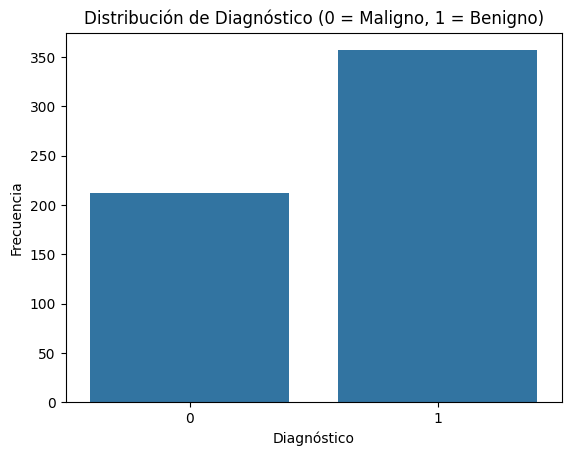

In [8]:
# Visualización rápida de las clases
sns.countplot(x='target', data=df)
plt.xlabel("Diagnóstico")
plt.ylabel("Frecuencia")
plt.title("Distribución de Diagnóstico (0 = Maligno, 1 = Benigno)")
plt.show()

### **Tratamiento de datos faltantes o erróneos**

In [9]:
# Verificar si hay valores nulos
print("Valores nulos por columna:\n", df.isnull().sum())

Valores nulos por columna:
 id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dim

In [10]:
# Creamos una copia del DataFrame para trabajar sin afectar el original
df_clean = df.copy()
# Seleccionamos solo las columnas que puedan presentar outliers relevantes
columns_to_check = ['area_mean', 'radius_mean', 'perimeter_mean', 'concavity_mean']

# Eliminamos outliers usando el método del IQR para cada columna
for col in columns_to_check:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    # Filtramos filas que están dentro del rango válido
    df_clean = df_clean[(df_clean[col] >= lower) & (df_clean[col] <= upper)]

In [11]:
# Resultado después de eliminar outliers
print(f"Instancias originales: {df.shape[0]}")
print(f"Instancias después del tratamiento de outliers: {df_clean.shape[0]}")

Instancias originales: 569
Instancias después del tratamiento de outliers: 529


### **Heatmap general de correlación**

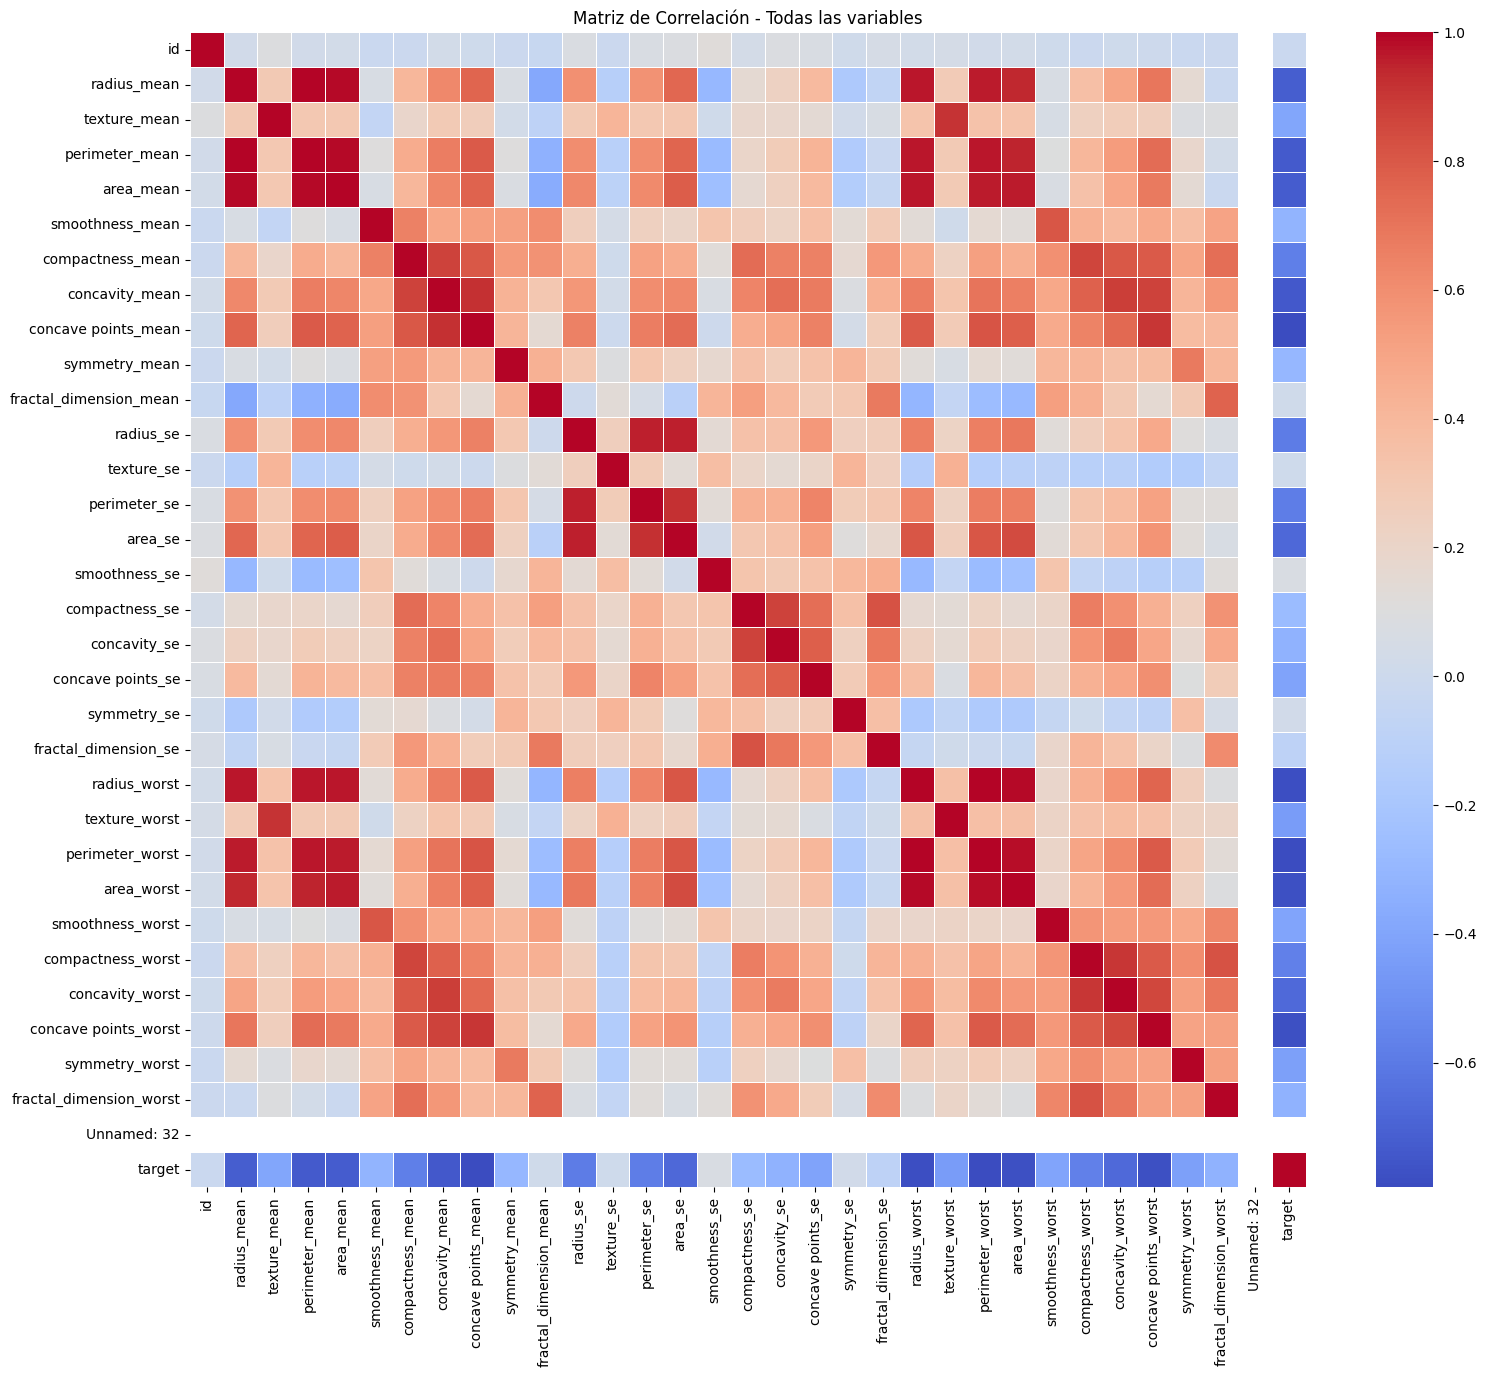

In [12]:
# Eliminamos columnas no numéricas
df_corr = df_clean.drop(columns=['diagnosis'], errors='ignore')

# Calculamos la matriz de correlación
corr_matrix = df_corr.corr()

# Visualización
plt.figure(figsize=(18, 15))
sns.heatmap(corr_matrix, cmap='coolwarm', linewidths=0.5)
plt.title("Matriz de Correlación - Todas las variables")
plt.show()

Se generó un heatmap de todas las variables numéricas del dataset para analizar la relación entre ellas.  
Este análisis permite detectar **grupos de variables altamente correlacionadas**, lo cual puede generar redundancia y afectar modelos de machine learning.

Por ejemplo, se observa que variables como `radius_mean`, `area_mean` y `perimeter_mean` están fuertemente correlacionadas, lo que justifica la aplicación de métodos de selección de características como `SelectKBest`.

## **Selección de features**

In [13]:
# Eliminamos columnas innecesarias si las hay
if 'id' in df_clean.columns:
    df_clean = df_clean.drop(columns='id')
if 'Unnamed: 32' in df_clean.columns:
    df_clean = df_clean.drop(columns='Unnamed: 32')  # suele aparecer como NaN

# Definimos X e y

# "dropeamos" las columnas "target" y "diagnosis" ya que representan a nuestra variable "y" y no pueden estar en "X"
 #(además de que tira un error ya que "diagnosis" es una columna de strings)
X = df_clean.drop(columns=['target', 'diagnosis'])
y = df_clean['target']

# Aplicamos SelectKBest, seleccionamos las 10 columnas más importantes o "interesantes" de acuerdo a x e y
selector = SelectKBest(score_func=f_classif, k=10)
X_selected = selector.fit_transform(X, y)

# Mostramos las columnas seleccionadas
selected_mask = selector.get_support()
selected_features = X.columns[selected_mask]
print("Features seleccionadas:", selected_features.to_list())

Features seleccionadas: ['radius_mean', 'perimeter_mean', 'area_mean', 'concavity_mean', 'concave points_mean', 'area_se', 'radius_worst', 'perimeter_worst', 'area_worst', 'concave points_worst']


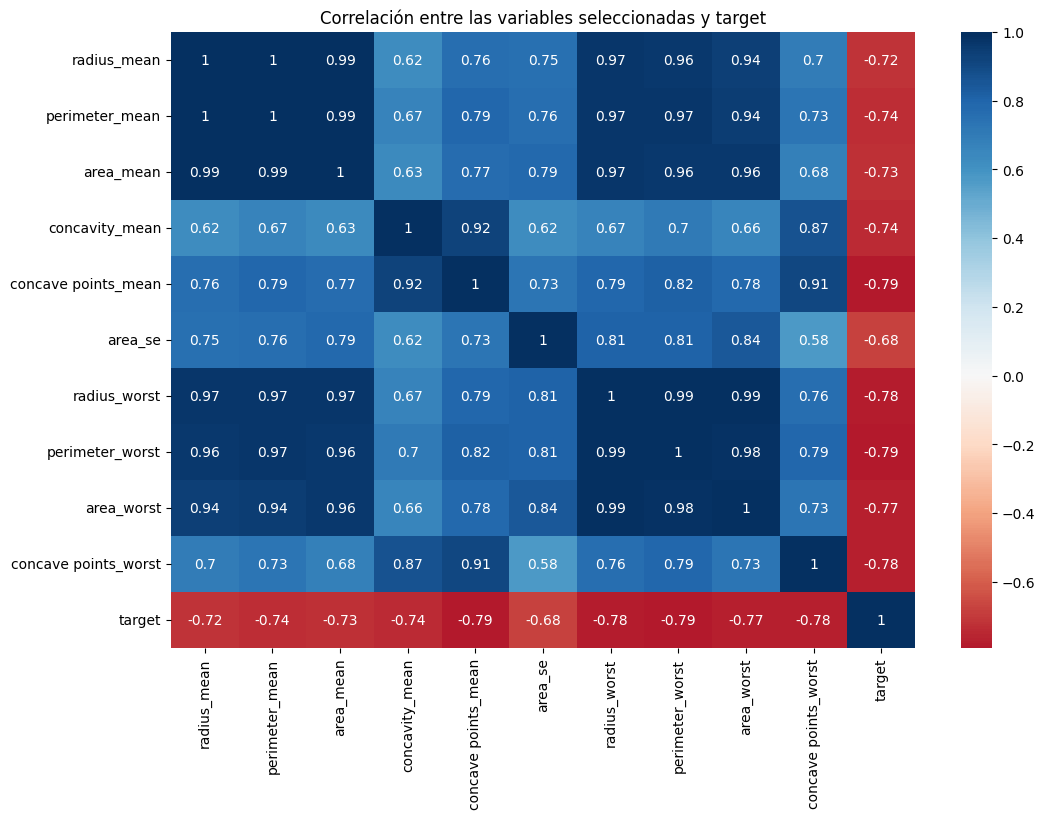

In [14]:
# Creamos nuevo DataFrame con las 10 features seleccionadas y 'target'
selected_df = df_clean[selected_features.to_list() + ['target']]

# Matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(selected_df.corr(), annot=True, cmap='RdBu', center=0)
plt.title("Correlación entre las variables seleccionadas y target")
plt.show()

Este heatmap muestra las **correlaciones entre las 10 variables seleccionadas por `SelectKBest`** y la variable objetivo `target`.

Se puede observar que varias de las variables seleccionadas tienen una **fuerte relación positiva o negativa con el diagnóstico**, lo que confirma que fueron correctamente elegidas como relevantes para el modelo.

Este análisis permite validar que las variables incluidas aportan información útil para predecir el tipo de tumor.

Se observó que varias variables tienen una fuerte **correlación negativa con la variable `target`**.

Esto es esperable, ya que `target` codifica:
- 0 = maligno
- 1 = benigno

Por lo tanto, valores altos en estas variables se asocian a mayor probabilidad de malignidad.  
Este tipo de relación inversa es completamente válida e incluso esperada en problemas médicos, donde ciertas características extremas suelen indicar mayor gravedad.

## **Entrenamiento del modelo de clasificación (KNN)**

In [15]:
# Escalamos los datos para obtener información más precisa
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_selected)

# Dividimos los datos en entrenamiento (70%) y test (30%)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Creamos el modelo con 5 vecinos
knn = KNeighborsClassifier(n_neighbors=10)

# Entrenamos el modelo
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

Para entrenar el modelo, se eligió el algoritmo de clasificación supervisada **K-Nearest Neighbors (KNN)**.  
Este método clasifica una nueva observación en función de la clase mayoritaria entre sus `k` vecinos más cercanos en el espacio de características.

Se seleccionó **KNN** por su simplicidad, interpretabilidad y buen rendimiento en datasets donde las clases están bien separadas, como es el caso del *Breast Cancer Wisconsin Dataset*.

Se utilizó el conjunto de datos reducido a las **10 variables más relevantes** seleccionadas con `SelectKBest`, y se dividió el dataset en:

- **70% para entrenamiento**
- **30% para test**

El modelo se entrenó con **k = 10 vecinos** (valor por defecto inicial) utilizando `X_train` y `y_train`.


## **Evaluación del modelo y métricas**

In [16]:
# Predecimos sobre los datos de test
y_pred = knn.predict(X_test)

# Evaluamos la precisión del modelo
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred))
print("\nMatriz de confusión:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.9433962264150944

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.92      0.91      0.91        53
           1       0.95      0.96      0.96       106

    accuracy                           0.94       159
   macro avg       0.94      0.93      0.94       159
weighted avg       0.94      0.94      0.94       159


Matriz de confusión:
 [[ 48   5]
 [  4 102]]


Una vez entrenado el modelo, se lo probó con datos nuevos (test) para ver su rendimiento real.

Se calcularon varias métricas importantes:

- **Accuracy**: mide el porcentaje total de predicciones correctas.
- **Precision**: indica qué tan confiable es el modelo cuando predice una clase.
- **Recall**: muestra cuántos casos reales de cada clase fueron detectados.
- **F1 Score**: balance entre precisión y recall.
- **Matriz de confusión**: permite visualizar en detalle los aciertos y errores, especialmente útil para identificar falsos negativos en casos malignos.

Estas métricas son fundamentales para validar que el modelo no solo predice bien en general, sino que **detecta correctamente los casos críticos**.

### **Visualización de la matriz de confusión**

La matriz de confusión representa el desempeño del modelo sobre el conjunto de prueba. En este caso:

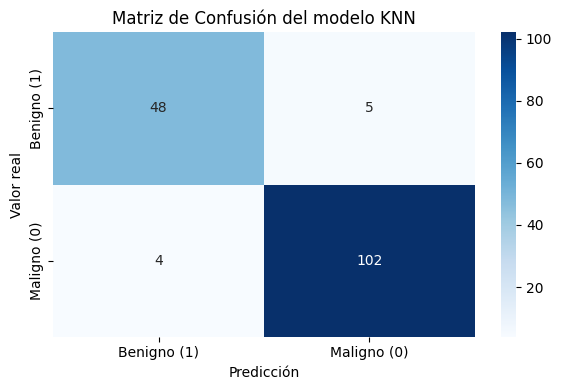

In [17]:
# Calculamos la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Etiquetas para el gráfico
labels = ['Benigno (1)', 'Maligno (0)']

# Creamos el heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicción')
plt.ylabel('Valor real')
plt.title('Matriz de Confusión del modelo KNN')
plt.tight_layout()
plt.show()

Se puede observar:

- **48 de los 53 tumores malignos fueron correctamente identificados.**
- **5 tumores malignos fueron clasificados como benignos (falsos negativos).**
- El modelo clasificó **102 de 106 tumores benignos correctamente**, con solo 4 falsos positivos.

Esta matriz refleja un **buen balance general**, con **muy pocos errores graves**, cumpliendo con el objetivo de detectar al menos el **90% de los casos malignos**.

##**Conclusiones generales del proyecto**




Este proyecto abordó la detección del cáncer de mama utilizando el conjunto de datos **Breast Cancer Wisconsin Diagnostic Dataset**, con el objetivo de construir un modelo predictivo que sea capaz de **distinguir entre tumores malignos y benignos** con alto grado de precisión, priorizando especialmente la **sensibilidad (recall) para la clase maligna**, debido a la relevancia médica de estos casos.

A lo largo del análisis se realizaron las siguientes etapas:

###**Exploración y preprocesamiento de datos**

- Se eliminaron columnas irrelevantes como `id` y `Unnamed: 32`.
- Se creó una variable `target` binaria, donde `0 = maligno` y `1 = benigno`.
- Se identificaron y eliminaron valores atípicos en variables clave para evitar distorsiones estadísticas.
- Se confirmaron relaciones significativas entre varias variables y el diagnóstico mediante visualizaciones y una matriz de correlación.

###**Selección de características**

- Se utilizó el método `SelectKBest` para seleccionar las **10 variables más relevantes**, lo que permitió reducir la dimensionalidad del dataset y enfocarse en las características con mayor poder predictivo.
- Estas variables mostraron una fuerte correlación negativa con la variable `target`, lo cual es consistente con el hecho de que valores más altos en características como `area_worst` o `concave_points_worst` suelen asociarse con tumores malignos.

###**Modelado con K-Nearest Neighbors (KNN)**

- Se eligió el algoritmo KNN por su simplicidad, interpretabilidad y buen desempeño en clasificación básica.
- Inicialmente se utilizó `k=10` sin escalar los datos, obteniendo una accuracy de 91.8% y un recall del 85% para tumores malignos.
- Luego se aplicó **escalado de variables** con `StandardScaler`, lo que mejoró significativamente el rendimiento del modelo:
  - **Accuracy:** 94.3%
  - **Recall en clase 0 (malignos):** 91%
  - **Reducción de falsos negativos:** de 8 a 5

Este resultado es especialmente relevante, ya que en contextos médicos el costo de un **falso negativo** (no detectar un tumor maligno) puede ser alto.

###**Evaluación**

- Las métricas de precisión, recall y F1-score fueron altas para ambas clases.
- La **matriz de confusión** mostró un buen equilibrio entre aciertos y errores, con baja tasa de clasificación incorrecta.
- Se comprobó que el escalado de variables es crucial en modelos basados en distancia como KNN.

##**Conclusiones relacionadas a las preguntas de investigación y el problema comercial**

A lo largo del análisis, se respondieron las siguientes preguntas clave:

---


###**¿Qué variables tienen mayor influencia en la clasificación?**

**Hipótesis confirmada.**  
Las variables relacionadas con el tamaño y la forma del tumor, como `radius_mean`, `area_mean`, `perimeter_mean`, `concavity_mean` y `concave_points_mean`, resultaron ser las más relevantes. Esto se confirmó mediante:
- La selección automática de variables (`SelectKBest`)
- Altos valores de correlación negativa con la variable `target`
- Visualizaciones que mostraron diferencias claras entre diagnósticos

Estas variables fueron las que más contribuyeron al rendimiento del modelo.

---

### **¿Existen patrones visuales que permitan diferenciar entre tumores benignos y malignos?**

**Hipótesis confirmada.**  
Se encontraron patrones visuales claros utilizando:
- Un gráfico de barras (`countplot`) para observar la distribución de diagnósticos (malignos y benignos)
- Heatmaps de la matriz de correlación, que mostró relaciones fuertes entre ciertas variables y la variable objetivo `target`

Estas visualizaciones permitieron identificar diferencias estructurales entre tumores malignos y benignos, especialmente en variables como `area_mean`, `concavity_mean` y `radius_worst`, que presentaron correlaciones fuertes con el diagnóstico.

---

### **¿Puede un modelo supervisado (KNN) predecir con precisión el tipo de tumor?**


**Hipótesis confirmada.**  
Se entrenó un modelo KNN utilizando las 10 mejores variables y datos estandarizados. El modelo logró:

- **Accuracy**: 94.3%
- **Recall para tumores malignos**: 91%
- **F1-score malignos**: 0.91
- **Falsos negativos**: 5 (sobre 53 casos reales)

Esto cumple con el objetivo de lograr una **detección superior al 90% de los tumores malignos**, y demuestra que KNN es un modelo viable como herramienta de apoyo diagnóstico en este contexto.

---


### **¿Qué tan precisas son las predicciones y cómo se evaluó?**

**Hipótesis confirmada.**  
Se utilizaron múltiples métricas de evaluación:
- `accuracy_score`
- `precision`, `recall`, `f1_score`
- Matriz de confusión (visual y numérica)

Estas métricas confirmaron un **alto rendimiento global** y un **bajo nivel de error**, sobre todo en la clase maligna, que es la más crítica en un entorno médico.

---

### **Conexión con el problema comercial**

El modelo entrenado podría utilizarse como:
- Herramienta de **apoyo al diagnóstico médico**
- **Filtro automático preliminar** para clasificar casos de forma rápida
- **Segundo lector** en hospitales con alta demanda, ayudando a reducir errores humanos y acelerar decisiones clínicas

### **Consideraciones finales**

- El modelo entrenado cumple con el objetivo de **detectar más del 90% de los casos malignos**, manteniendo alta precisión en general.
- El proceso de preprocesamiento y selección de características fue clave para simplificar el modelo sin perder rendimiento.